#**Importing the python libraries and packages**

In [7]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


##**Adding dataset from google drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


##**Reading the dataset and stored to DataFrame**

In [3]:
data=pd.read_csv('/content/drive/MyDrive/mushrooms.csv')

#**Examining the Data**

#####After importing the data, to learn more about the dataset, we’ll use .head() .info() and .describe() methods.

The **.head()** method will give you the first 5 rows of the dataset. Here is the output:

In [8]:
data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


The **.info()** method will give you a concise summary of the DataFrame. This method will print the information about the DataFrame including the index dtype and column dtypes, non-null values, and memory usage. Here is the output:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

#**Descriptive Statistics**

The **.describe()** method will give you the statistics of the columns.

count shows the number of responses.

unique shows the number of unique categorical values.

top shows the highest-occurring categorical value.

freq shows the frequency/count of the highest-occurring categorical value.

Here is the output:

In [9]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


##**The shape of the dataset**

In [12]:
print('Dataset shape:', data.shape)

Dataset shape: (8124, 23)


Here we can see 8124 rows and 23 columns

#**Unique occurrences of all columns**

In [5]:
for i in data.columns:
  print('\n'+'Column Name :',i+'\n'+'Total Unique values :',data[i].nunique(),'\n'+'---------------------------'+'\n',data[i].unique())


Column Name : class
Total Unique values : 2 
---------------------------
 ['p' 'e']

Column Name : cap-shape
Total Unique values : 6 
---------------------------
 ['x' 'b' 's' 'f' 'k' 'c']

Column Name : cap-surface
Total Unique values : 4 
---------------------------
 ['s' 'y' 'f' 'g']

Column Name : cap-color
Total Unique values : 10 
---------------------------
 ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']

Column Name : bruises
Total Unique values : 2 
---------------------------
 ['t' 'f']

Column Name : odor
Total Unique values : 9 
---------------------------
 ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']

Column Name : gill-attachment
Total Unique values : 2 
---------------------------
 ['f' 'a']

Column Name : gill-spacing
Total Unique values : 2 
---------------------------
 ['c' 'w']

Column Name : gill-size
Total Unique values : 2 
---------------------------
 ['n' 'b']

Column Name : gill-color
Total Unique values : 12 
---------------------------
 ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 

##**Now let’s visualize the count of edible and poisonous mushrooms using Sea**born

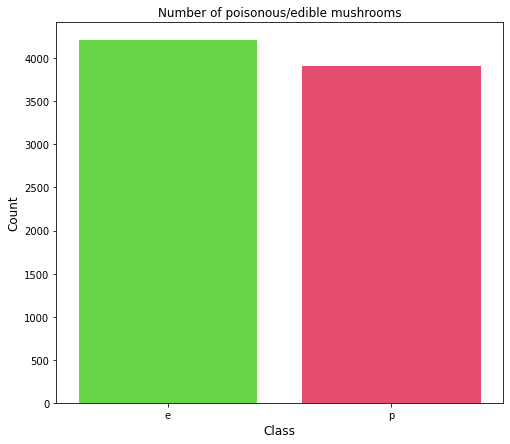

In [13]:
count = data['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')

plt.show()

#**Data Preprocessing**
The data is categorical so we’ll use LabelEncoder to convert it to ordinal. LabelEncoder converts each value in a column to a number.
This approach requires the category column to be of ‘category’ datatype. By default, a non-numerical column is of ‘object’ datatype. From the df.describe() method, we saw that our columns are of ‘object’ datatype. So we will have to change the type to ‘category’ before using this approach.

In [14]:
df=data.copy() #copy the original dataset to another dataframe df

In [15]:
df = df.astype('category')
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

As we can see, our columns are now of type ‘category’. We can now use LabelEncoder to convert categorical values to ordinal.

In [17]:
mapping=list()
encoder=LabelEncoder()
for columns in range(len(df.columns)):
  df[df.columns[columns]] = encoder.fit_transform(df[df.columns[columns]])
  mappings_dict = {index: label for index, label in enumerate(encoder.classes_)} # map the original value to its corresponding numeric values
  mapping.append(mappings_dict)


In [18]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [19]:
mapping # map the original value to its corresponding numeric values

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y

Also, the column “veil-type” is 0 and not contributing to the data so we’ll remove it.

In [20]:
df['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int64

In [21]:
df = df.drop(["veil-type"],axis=1)

#**Preparing the Data**
Setting X and y-axis and splitting the data into train and test respectively.


In [23]:
y = df['class']
X = df.drop('class', axis=1)

###**Now Scale the X**

In [24]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [26]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,1.781460,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,0.838989,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,0.838989,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,1.781460,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,1.781460,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.216992,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,-1.045952,0.683778,0.586385,-0.429288,-0.416681,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8120,1.029712,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,-1.045952,0.683778,0.586385,-0.429288,-0.416681,-8.100146,-0.256132,0.948081,-1.509643,0.284330,0.285710
8121,-0.840343,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,0.053477,-1.144806,-1.045952,0.683778,0.586385,-0.429288,-0.416681,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8122,-0.216992,0.953270,-0.198250,-0.843230,1.832689,0.162896,-0.438864,1.494683,-1.358896,0.873511,-1.045952,0.683778,-0.893053,0.622441,0.631991,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.285710


In [28]:
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.8)

#**Model Selection**

#**Decision Tree Classification**

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [53]:
import os
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

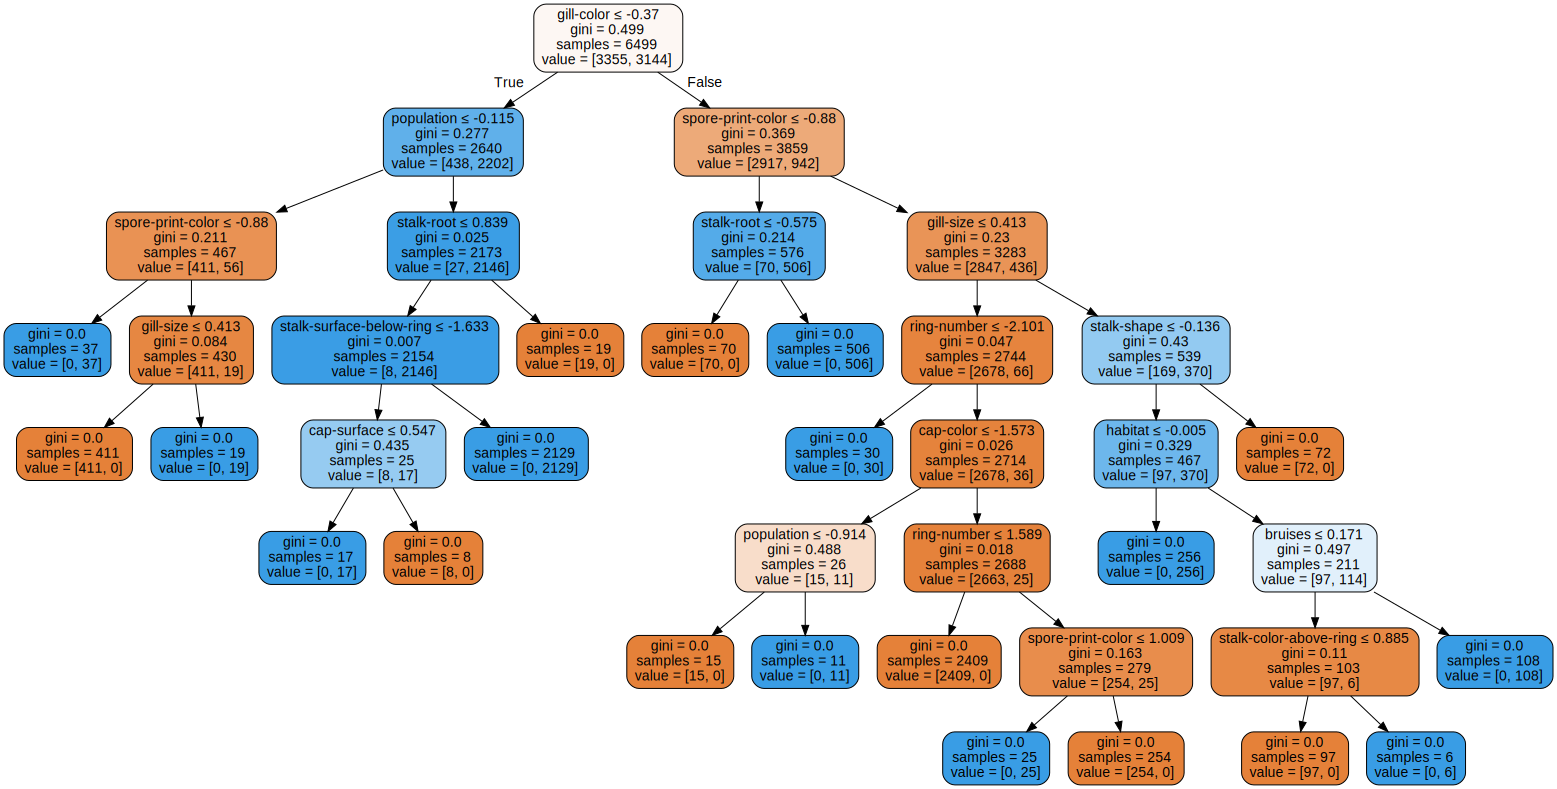

In [54]:
dot_data = export_graphviz(dt, out_file=None, 
 feature_names=X.columns, 
 filled=True, rounded=True, 
 special_characters=True)
graph = graphviz.Source(dot_data)
graph

##**Feature Importance**

By all methods examined before the most important feature is “gill-color”.
Let’s visualize it:

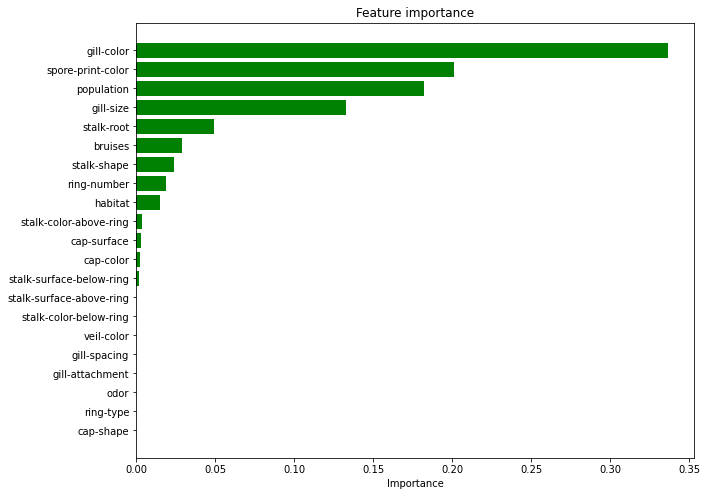

In [55]:
features_list = X.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10,8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="green")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()

plt.show()

###**Predicting and estimating the result**

In [56]:
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       853
           1       1.00      1.00      1.00       772

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Test Accuracy: 100.0%


**Confusion Matrix for Decision Tree Classifier**

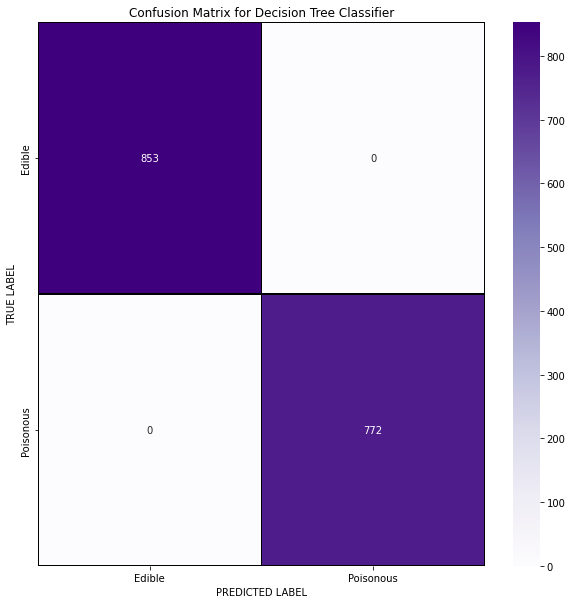

In [57]:
cm = confusion_matrix(y_test, y_pred_dt)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(10,10))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')

plt.show()

**Logistic Regression Classification**

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

Test Accuracy: 95.02%


**Classification report of Logistic Regression Classifier**

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

In [31]:
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.95      0.96      0.95       853
           1       0.95      0.94      0.95       772

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



**Confusion Matrix for Logistic Regression Classifier**

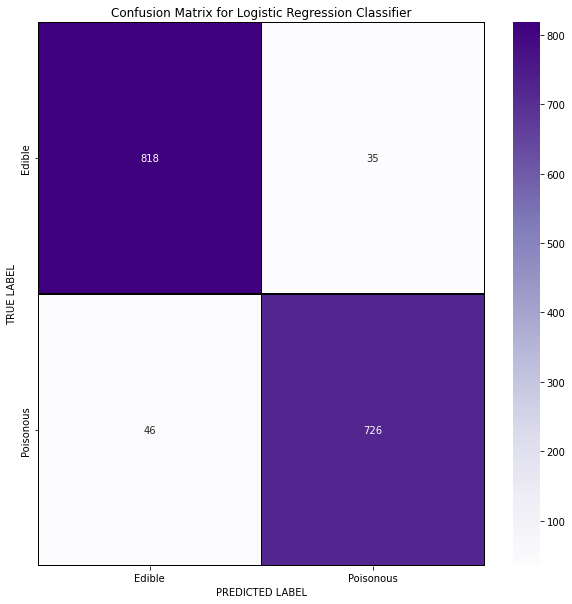

In [32]:
cm = confusion_matrix(y_test, y_pred_lr)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(10,10))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')

plt.show()

**KNN Classification**

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    if knn.score(X_test, y_test) > best_score:
        best_score = knn.score(X_train, y_train)
        best_Kvalue = i
        
print("Best KNN Value: {}".format(best_Kvalue))
print("Test Accuracy: {}%".format(round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 100.0%


**Classification report of KNN Classifie**r

In [35]:
y_pred_knn = knn.predict(X_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       853
           1       1.00      0.99      1.00       772

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



**Confusion Matrix for KNN Classifier**

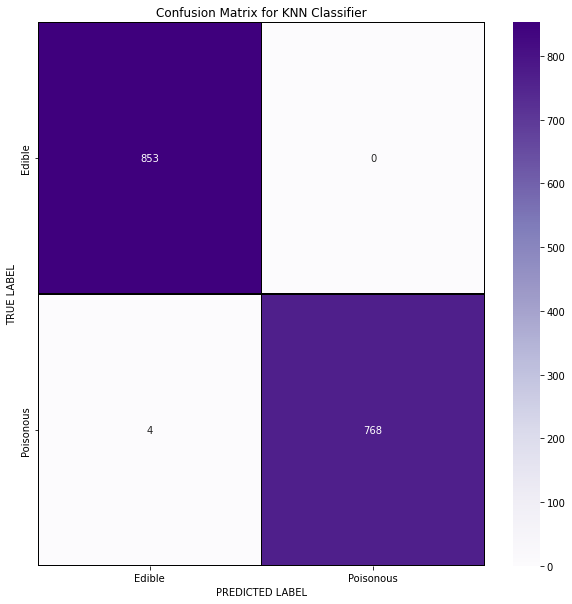

In [37]:
cm = confusion_matrix(y_test, y_pred_knn)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(10,10))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')

plt.show()

**SVM Classification**

In [38]:
svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(svm.score(X_test, y_test)*100, 2)))

Test Accuracy: 100.0%


**Classification report of SVM Classifier**

In [39]:
y_pred_svm = svm.predict(X_test)
print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_svm))

SVM Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       853
           1       1.00      1.00      1.00       772

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



**Confusion Matrix for SVM Clas**sifier

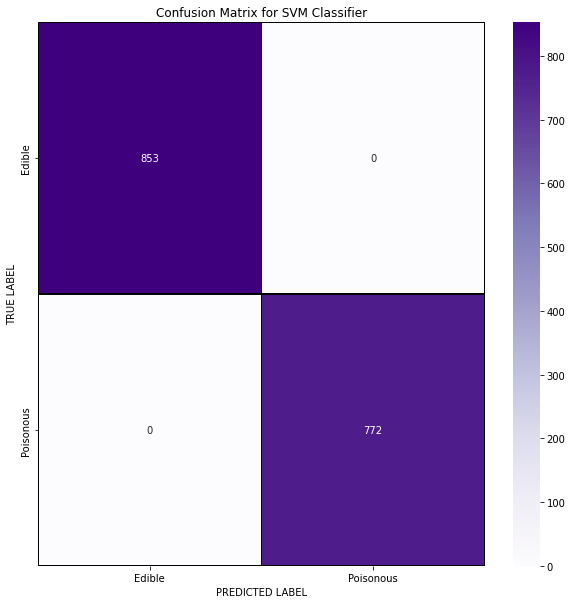

In [40]:
cm = confusion_matrix(y_test, y_pred_svm)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(10,10))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier')

plt.show()

**Naive Bayes Classification**

In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(nb.score(X_test, y_test)*100, 2)))

Test Accuracy: 91.63%


**Classification report of Naive Bayes Class**ifier

In [43]:
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_nb))

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.92      0.92      0.92       853
           1       0.91      0.91      0.91       772

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625



**Confusion Matrix for Naive Bayes Classifier**

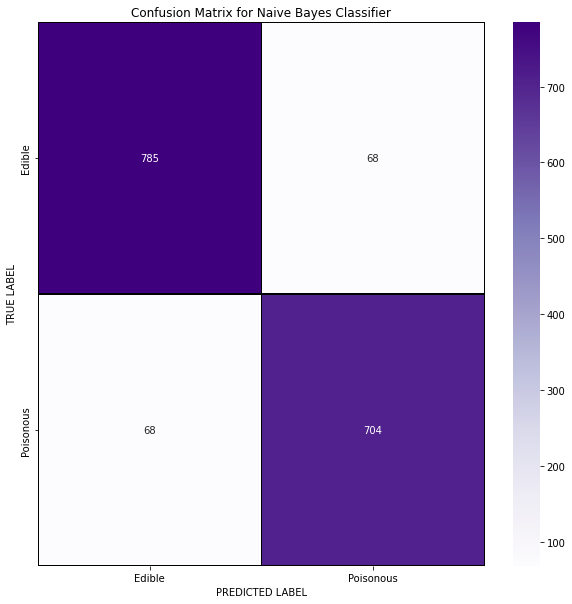

In [44]:
cm = confusion_matrix(y_test, y_pred_nb)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(10,10))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

#**Predictions**

Predicting some of the X_test results and matching it with true i.e. y_test values using Decision Tree  Classifier.

In [58]:
preds = dt.predict(X_test)
print(preds[:36])
print(y_test[:36].values)
# 0 - Edible
# 1 - Poisonous

[1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0]
[1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0]


Predicting some of the X_test results and matching it with true i.e. y_test values using Logistic Regression .

In [59]:
preds = lr.predict(X_test)
print(preds[:36])
print(y_test[:36].values)
# 0 - Edible
# 1 - Poisonous

[1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0]
[1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0]


Predicting some of the X_test results and matching it with true i.e. y_test values using KNN classifier 

In [60]:
preds = knn.predict(X_test)
print(preds[:36])
print(y_test[:36].values)
# 0 - Edible
# 1 - Poisonous

[1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0]
[1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0]


Predicting some of the X_test results and matching it with true i.e. y_test values using SVM

In [61]:
preds = svm.predict(X_test)
print(preds[:36])
print(y_test[:36].values)
# 0 - Edible
# 1 - Poisonous

[1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0]
[1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0]


Predicting some of the X_test results and matching it with true i.e. y_test values using Naive Bayes Classifier.

In [45]:
preds = nb.predict(X_test)
print(preds[:36])
print(y_test[:36].values)
# 0 - Edible
# 1 - Poisonous

[1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0]
[1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0]


#**Visualization**

In [46]:
X_test.shape

(1625, 21)

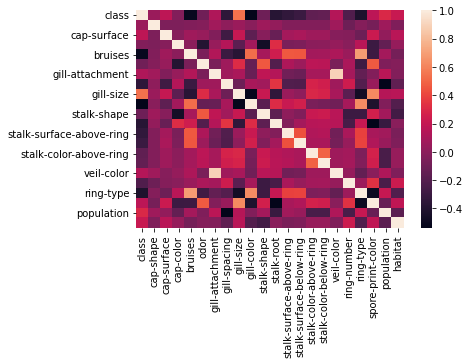

In [48]:
corr = df.corr()

sns.heatmap(corr)

#**Conclusion**

we saw that our train and test data is balanced.
All the classification methods hit more than 90% accuracy among that SVM & KNN shows 100% accuracy with this dataset.
